# **DERIVATIVE PRICING Group Work Project #1 | Group #1207**

|  |  |  |
|:---|:---|:---|
|**FULL LEGAL NAME** |  **LOCATION (COUNTRY)** |**EMAIL ADDRESSE** |
| Khaled Tamim | France | ktamim.pro@gmail.com |
| Bramuel Chetinde Aswani | Kenya | chetindeaswani@gmail.com |  
| Martin Gatore | Rwanda | gatore68@gmail.com |

---


#**STEP 1**
---

## Put-Call Parity in the context of binomial tree Model - **Group**


### **Question 1** - Application of Put-Call Parity for European Options

Put-call parity applies for European options. It is based on the principle of no-arbitrage and applies to any two securities that have the same underlying asset and expiration date. European call and put options on the same underlying asset with the same strike price and expiration date are essentially the same securities but with different payoffs. Therefore, their prices must be related in a specific way according to put-call parity, which states that the sum of the price of a call option and the present value of the strike price of a put option is equal to the sum of the price of a put option and the present value of the underlying asset. If put-call parity does not hold, then there is an opportunity for arbitrage, and the prices of the options will adjust until parity is achieved.

### **Question 2** - Solving for Call Price using Put-Call Parity

Put-call parity can be rearranged to solve for the call price as follows:

$C + PV(K) = P + S$

$C = P + S - PV(K)$

where $C$ is the price of the call option, $PV(K)$ is the present value of the strike price, $P$ is the price of the put option, and $S$ is the current price of the underlying asset.

### **Question 3** - Solving for Put Price using Put-Call Parity

Put-call parity can be rearranged to solve for the put price as follows:

$P + S = C + PV(K)$

$P = C + PV(K) - S$

where $P$ is the price of the put option, $PV(K)$ is the present value of the strike price, $C$ is the price of the call option, and $S$ is the current price of the underlying asset.


### **Question 4** - Put-Call Parity for American Options

Put-call parity does apply for American options, but it is more complex because American options can be exercised at any time before expiration, while European options can only be exercised at expiration. This means that the early exercise of an American option can affect the put-call parity relationship. However, in a binomial tree model, the put-call parity relationship can still be used to verify the prices of American options. If put-call parity does not hold for American options, then there is an opportunity for arbitrage and the prices will adjust until parity is achieved. In practice, other models, such as the Black-Scholes model, may be used to price American options.


## Working with European Calls and Puts using a Binomial Tree Model - **Team member A**

### **Question 5** - Pricing an ATM European Call and Put Option with a Binomial Tree Model

**a. Number of steps in the tree**


For an ATM European call and put option, the strike price is equal to the current stock price, which is 100 in this case. To achieve reliable estimates, we can choose a number of steps in the tree between 50 to 100. We can use a higher number of steps to achieve more accurate estimates, but this also increases computational resources and may not be necessary for a good estimate. For our case we choose a tree with 100 steps and will check later if this number needs to be adjusted by calculating the convergence.



**b. Overall ATM pricing process**

To price an ATM (At-the-Money) European call and put option using a binomial tree, we follow these steps:

1. Determine the number of time steps in the tree. This is a trade-off between accuracy and computational efficiency. More time steps generally lead to more accurate prices but also take more computational resources.

2. Calculate the size of each time step. The size of each time step depends on the time to expiration of the option and the number of time steps in the tree.

3. Calculate the up and down factors for the tree. These factors depend on the volatility of the underlying asset, the size of each time step, and the interest rate.

4. Calculate the option prices at each node of the tree. We start at the final time step and work backwards to the present time, using the risk-neutral probabilities of moving up or down in the tree and the expected option prices at the next time step.

5. Compute the present value of the option price at the root node of the tree, which represents the option price at time zero.

The time step is T/100 = (3/12)/100 = 1/400 years. We can calculate the up and down factors for the tree as follows:

u = exp(σ * sqrt(1/400)) = 1.01
d = 1/u = 0.99

Using these up and down factors, we can construct the binomial tree and calculate the option prices at each node. Finally, we can calculate the present value of the option price at the root node to obtain the option price.

Calculating European call option using binomial tree:

In [ ]:
import numpy as np
from prettytable import PrettyTable
def binomial_european_call(S0, sigma, K, T, r, N):
    dt = T / N  # Define time step
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probs
    C = np.zeros([N + 1, N + 1])  # Call prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    for i in range(0, N + 1):
        C[N, i] = max(S0 * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S0 * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S0 * (u ** (i)) * (d ** (j - i))
    return C[0, 0], C, S

def binomial_european_put(S0, sigma, K, T, r, N):
    dt = T / N  # Define time step
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probs
    P = np.zeros([N + 1, N + 1])  # Call prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    for i in range(0, N + 1):
        P[N, i] = max(K - (S0 * (u ** (i)) * (d ** (N - i))), 0)
        S[N, i] = S0 * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S0 * (u ** (i)) * (d ** (j - i))
    return P[0, 0], P, S

def put_call_parity_european(S0, K, r, T, call_price, put_price):
    left_side = round(call_price - put_price, 2)
    right_side = round(S0 - K * np.exp(-r * T),2)
    parity_diff = abs(left_side - right_side)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    return

# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Calculating call and put options
call_price, C, S = binomial_european_call(S0, sigma, K, T, r, N)
call_price = round(call_price,2)
put_price, P, S = binomial_european_put(S0, sigma, K, T, r, N)
put_price = round(put_price,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Price"]
table.add_row(["ATM European call", call_price])
table.add_row(["ATM European put", put_price])
print(table)

# Put-Call parity check
put_call_parity_european(S0, K, r, T, call_price, put_price)

+-------------------+-------+
|       Option      | Price |
+-------------------+-------+
| ATM European call |  4.61 |
|  ATM European put |  3.36 |
+-------------------+-------+
Put-Call Parity holds.


Checking the convergence and if the selected N makes sense:

In [ ]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500]:
    price, P, S = binomial_european_call(100, 0.2, 100, 0.25, 0.05, N)
    price_array.append(price)
    print("With N = {:3d}, the price is {:.2f}".format(N, price))
for N in [1, 10, 100, 200, 300, 400, 500]:
    price, P, S = binomial_european_put(100, 0.2, 100, 0.25, 0.05, N)
    price_array.append(price)
    print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 5.59
With N =  10, the price is 4.52
With N = 100, the price is 4.61
With N = 200, the price is 4.61
With N = 300, the price is 4.61
With N = 400, the price is 4.61
With N = 500, the price is 4.61
With N =   1, the price is 4.34
With N =  10, the price is 3.27
With N = 100, the price is 3.36
With N = 200, the price is 3.37
With N = 300, the price is 3.37
With N = 400, the price is 3.37
With N = 500, the price is 3.37


N= 100 seems to be convenient to achieve reliable estimates.

### **Question 6** - Greek Delta for the European call and European put at time 0

**a. Comparison**

To compute Delta for the European call and European put, we can use the following formulas:

Delta for the European call:

$$\Delta_{\text{call}} = \frac{C(S_0+\Delta S)-C(S_0)}{\Delta S}$$

Delta for the European put:

$$\Delta_{\text{put}} = \frac{P(S_0+\Delta S)-P(S_0)}{\Delta S}$$

where $C$ and $P$ are the call and put prices at time 0, respectively, $S_0$ is the stock price at time 0, and $\Delta S$ is a small change in the stock price.

In [ ]:
# Compute delta of call option
delta_call = (C[1,1] - C[1,0]) / (S[1,1] - S[1,0])
print("Delta of European call option: ", round(delta_call,2))

# Compute delta of put option
delta_put = (P[1,1] - P[1,0]) / (S[1,1] - S[1,0])
print("Delta of European put option: ", round(delta_put,2))


Delta of European call option:  0.57
Delta of European put option:  -0.43


The Delta of the European call option is 0.57, which is positive, and the Delta of the European put option is -0.43, which is negative. Therefore, the Delta for the call option is greater than that for the put option. This means that the call option is positively correlated with the underlying asset, while the put option is negatively correlated.

**b. Differences and signs of Delta for both options**

The Delta of an option is a measure of the option's sensitivity to changes in the underlying asset's price. A positive Delta indicates that the option price will increase with an increase in the underlying asset's price, while a negative Delta indicates that the option price will decrease with an increase in the underlying asset's price.

For the European call option, the Delta is positive, indicating that the option price will increase with an increase in the underlying asset's price. In other words, as the stock price goes up, the call option's price goes up. Therefore, a Delta of 0.57 suggests that the option is moderately sensitive to changes in the underlying asset's price.

On the other hand, for the European put option, the Delta is negative, indicating that the option price will decrease with an increase in the underlying asset's price. In other words, as the stock price goes up, the put option's price goes down. Therefore, a Delta of -0.43 suggests that the option is also moderately sensitive to changes in the underlying asset's price, but in the opposite direction.

The Delta of an option can be thought of as a proxy for the option's exposure to the underlying asset. It is a key parameter in options trading as it can be used to hedge risk. By buying or selling the underlying asset in the correct proportion, a trader can offset the Delta risk of an option position.

It makes sense to obtain a positive or negative Delta for each option as it indicates the option's sensitivity to changes in the underlying asset's price. A positive Delta is expected for a call option, while a negative Delta is expected for a put option, as they provide the option holder with the right to buy and sell the underlying asset, respectively.

### **Question 7** - Understanding Option Sensitivities

**a. Increasing option sensitivities**


In [ ]:
# Parameters
S0 = 100
K = 100
r = 0.05
sigma_20 = 0.20
sigma_25 = 0.25
T = 0.25
N = 100

# Calculating call and put options
call_price_20, C, S = binomial_european_call(S0, sigma_20, K, T, r, N)
call_price_25, C, S = binomial_european_call(S0, sigma_25, K, T, r, N)
put_price_20, P, S = binomial_european_put(S0, sigma_20, K, T, r, N)
put_price_25, P, S = binomial_european_put(S0, sigma_25, K, T, r, N)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Price for sigma 20%", "Price for sigma 25%"]
table.add_row(["ATM European call", round(call_price_20,2), round(call_price_25,2)])
table.add_row(["ATM European put", round(put_price_20,2), round(put_price_25,2)])
print(table)

# Put-Call parity check
put_call_parity_european(S0, K, r, T, call_price_25, put_price_25)

+-------------------+---------------------+---------------------+
|       Option      | Price for sigma 20% | Price for sigma 25% |
+-------------------+---------------------+---------------------+
| ATM European call |         4.61        |         5.59        |
|  ATM European put |         3.36        |         4.34        |
+-------------------+---------------------+---------------------+
Put-Call Parity holds.


The prices of both the ATM European call and put options increase when the volatility increases from 20% to 25%. The price of the call option increases from 4.61 to 5.59, and the price of the put option increases from 3.36 to 4.34.

**b. Potential Differential Impact**

The potential impact of a change in volatility may differ for call and put options. Generally, an increase in volatility leads to an increase in the value of both call and put options, as there is a higher likelihood of the underlying asset moving in a way that benefits the option holder. However, the impact on the value of the call and put options may not be symmetrical.

For example, when the volatility increases, the price of the call option may increase more than the price of the put option, as the call option gives the holder the right to buy the underlying asset at a certain price. If the underlying asset's price increases due to increased volatility, the call option's value will increase as well, giving the holder the potential to profit from the price increase.

An increase in volatility may not have as much impact on the value of a put option, as the put option gives the holder the right to sell the underlying asset at a certain price. If the underlying asset's price decreases due to increased volatility, the put option's value may increase, but the potential profit for the option holder may be limited due to the already low price of the underlying asset.

Therefore, the impact of a change in volatility on the value of call and put options may depend on other factors such as the strike price, time to expiration, and the current price of the underlying asset.

## Working with American Calls and Puts using a Binomial Tree Model - **Team member B**

### **Question 8** - Pricing an ATM American Call and Put Option with a Binomial Tree Model

**a. Number of steps in the tree**

For an ATM American call and put option, the strike price is equal to the current stock price, which is 100 in this case. To price this option using a binomial tree model, we need to choose a suitable number of steps in the tree. A higher number of steps will result in more accurate estimates, but it also increases the computational resources required. Therefore, we can start by selecting a tree with 50 to 100 steps, and then check the convergence of the option pricing by comparing the results of different tree sizes. For our case, we choose a binomial tree with 100 steps, and we will adjust this number if necessary to achieve convergence.

**b. Overall ATM pricing process**

To price an ATM (At-the-Money) American call and put option using a binomial tree, we follow these steps:
1. Determine the number of time steps in the tree. This is a trade-off between accuracy and computational efficiency. More time steps generally lead to more accurate prices but also take more computational resources.

2. Calculate the size of each time step. The size of each time step depends on the time to expiration of the option and the number of time steps in the tree.

3. Calculate the up and down factors for the tree. These factors depend on the volatility of the underlying asset, the size of each time step, and the interest rate.

4. Calculate the option prices at each node of the tree. We start at the final time step and work backwards to the present time, using the risk-neutral probabilities of moving up or down in the tree and comparing the option price at each node to the intrinsic value of the option. We choose the higher of the two values to account for the possibility of early exercise.

5. Compute the present value of the option price at the root node of the tree, which represents the option price at time zero.

For an American ATM option, we can calculate the up and down factors as before, and use these factors to construct the binomial tree. Then, for each node in the tree, we compare the option price to the intrinsic value of the option at that node, and choose the higher of the two values. Finally, we can calculate the present value of the option price at the root node to obtain the option price.


Calculating American call option using binomial tree:

In [ ]:
import numpy as np
from prettytable import PrettyTable

def binomial_american_call(S0, sigma, K, T, r, N):
    dt = T / N # Define time step
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r * dt) - d) / (u - d) # Risk neutral probs
    C = np.zeros([N + 1, N + 1]) # Call prices
    S = np.zeros([N + 1, N + 1]) # Underlying price
    for i in range(0, N + 1):
      C[N, i] = max(S0 * (u ** (i)) * (d ** (N - i)) - K, 0)
      S[N, i] = S0 * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
      for i in range(0, j + 1):
        exercise = S0 * (u ** i) * (d ** (j - i)) - K
        C[j, i] = max(np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]), exercise)
        S[j, i] = S0 * (u ** (i)) * (d ** (j - i))
    return C[0, 0], C, S

def binomial_american_put(S0, sigma, K, T, r, N):
    dt = T / N  # Define time step
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probs
    P = np.zeros([N + 1, N + 1])  # Put prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    for i in range(0, N + 1):
        P[N, i] = max(K - (S0 * (u ** (i)) * (d ** (N - i))), 0)
        S[N, i] = S0 * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.maximum(max(K - (S0 * (u ** (i)) * (d ** (j - i))), 0), np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i]))
            S[j, i] = S0 * (u ** (i)) * (d ** (j - i))
    return P[0, 0], P, S

def put_call_parity_american(S0, K, r, T, call_price, put_price):
    left_side = round(call_price - put_price, 2)
    right_side = round(max(S0 - K, 0) - (call_price - put_price), 2)
    parity_diff = abs(left_side - right_side)
    tolerance = 0.01 * S0  # 1% tolerance for difference between left and right sides 
    if parity_diff < tolerance:
        print("Put-Call Parity holds.")
    else:
        print("Put-Call Parity does not hold.")
    print("Put-Call Parity does not apply to American options.")
    return


# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Calculating call and put options
call_price_american, C, S = binomial_american_call(S0, sigma, K, T, r, N)
call_price_american = round(call_price_american,2)
put_price_american, P, S = binomial_american_put(S0, sigma, K, T, r, N)
put_price_american = round(put_price_american,2)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Price"]
table.add_row(["ATM American call", call_price_american])
table.add_row(["ATM American put", put_price_american])
print(table)

# Put-Call parity check
put_call_parity_american(S0, K, r, T, call_price_american, put_price_american)

+-------------------+-------+
|       Option      | Price |
+-------------------+-------+
| ATM American call |  4.61 |
|  ATM American put |  3.47 |
+-------------------+-------+
Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.


### **Question 9** - Greek Delta for the American call and European put at time 0

**a. Comparison**

To compute Delta for the American call and American put, we can use the following formulas:

Delta for the American call:

$$\Delta_{\text{call}} = \max \left(0, \frac{C(S_0+\Delta S)-C(S_0)}{\Delta S} \right)$$

Delta for the American put:

$$\Delta_{\text{put}} = \max \left(0, \frac{P(S_0+\Delta S)-P(S_0)}{\Delta S} \right)$$

where $C$ and $P$ are the call and put prices at time 0, respectively, $S_0$ is the stock price at time 0, and $\Delta S$ is a small change in the stock price.

The main difference is that for the American options, we need to take into account the possibility of early exercise. As a result, the Delta for the American call and put is the maximum between 0 and the Delta for the European call and put, respectively. This is because if the Delta is negative, it means that the option is out of the money and exercising early would result in a loss.

In [ ]:
# Compute delta of American call option
delta_call_american = max(0, (C[1,1] - C[1,0]) / (S[1,1] - S[1,0]))
print("Delta of American call option: ", round(delta_call_american,2))

# Compute delta of American put option
delta_put_american = max(0, (P[1,1] - P[1,0]) / (S[1,1] - S[1,0]))
print("Delta of American put option: ", round(delta_put_american,2))

Delta of American call option:  0.57
Delta of American put option:  0


The main difference is that we use the max function to take into account the possibility of early exercise. If the Delta calculated from the European formula is negative, it means that exercising early would result in a loss, so we set the Delta to 0 in that case. The Delta of the American call option is 0.57, while the Delta of the American put option is 0. This indicates that the call option has a higher likelihood of being exercised early, compared to the put option, if the stock price increases. In contrast, the put option is unlikely to be exercised early since it is out of the money.

**b. Differences and signs of Delta for both options**

The Delta of an option measures the sensitivity of the option price to changes in the underlying asset price. A positive Delta indicates that the option price increases when the underlying asset price increases, while a negative Delta indicates that the option price decreases when the underlying asset price increases. In the case of an American call option, a Delta of 0.57 suggests that the option price will increase by 0.57 when the underlying asset price increases by $1. This means that the holder of the call option will profit from an increase in the stock price, and may exercise early to capture the gain. On the other hand, the Delta of an American put option is 0, indicating that the option price does not change when the underlying asset price increases. This means that the holder of the put option has limited downside protection and may choose to hold the option until expiration, hoping that the stock price will decrease further.

Delta is a measure of the option's price sensitivity to changes in the underlying asset price. A positive Delta indicates that the option price increases when the underlying asset price increases, while a negative Delta indicates that the option price decreases when the underlying asset price increases. It makes sense to obtain a positive Delta for a call option, as it allows the holder to capture the upside potential of the underlying asset. Conversely, it makes sense to obtain a negative Delta for a put option, as it provides downside protection to the holder in case the underlying asset price falls.

### **Question 10** - Understanding Option Sensitivities

**a. Increasing option sensitivities**

In [ ]:
# Parameters
S0 = 100
K = 100
r = 0.05
sigma_20 = 0.20
sigma_25 = 0.25
T = 0.25
N = 100

# Calculating call and put options
call_american_price_20, C, S = binomial_american_call(S0, sigma_20, K, T, r, N)
call_american_price_25, C, S = binomial_american_call(S0, sigma_25, K, T, r, N)
put_american_price_20, P, S = binomial_american_put(S0, sigma_20, K, T, r, N)
put_american_price_25, P, S = binomial_american_put(S0, sigma_25, K, T, r, N)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Price for sigma 20%", "Price for sigma 25%"]
table.add_row(["ATM American call", round(call_american_price_20,2), round(call_american_price_25,2)])
table.add_row(["ATM American put", round(put_american_price_20,2), round(put_american_price_25,2)])
print(table)

# Put-Call parity check
put_call_parity_american(S0, K, r, T, call_american_price_25, put_american_price_25)

+-------------------+---------------------+---------------------+
|       Option      | Price for sigma 20% | Price for sigma 25% |
+-------------------+---------------------+---------------------+
| ATM American call |         4.61        |         5.59        |
|  ATM American put |         3.47        |         4.45        |
+-------------------+---------------------+---------------------+
Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.


The prices of both the American call and put options increase as the volatility increases, as evidenced by the fact that the option prices are higher when the volatility is 25% compared to when it is 20%.

**b. Potential differential impact**

The differential impact of an increase in volatility on call and put options depends on the Delta of the options. Since Delta is positive for a call option and negative for a put option, an increase in volatility will have a greater impact on the price of the call option compared to the put option. This is because an increase in volatility will increase the likelihood of the underlying asset price increasing, and therefore increase the potential profit of the call option holder. On the other hand, an increase in volatility will have a smaller impact on the put option, as it will also increase the likelihood of the underlying asset price decreasing, which would increase the potential profit of the put option holder. However, the put option is already out of the money, so the increase in potential profit may not be significant. Therefore, the impact of an increase in volatility is likely to be asymmetric between call and put options.

## Graphical and Analytical Confirmations of Data - **Team member C**

### **Question 11** - European call and put: put-call parity check

To show that the European call and put options satisfy put-call parity, we can create a synthetic call and a synthetic put using the prices of the European call and put options. The synthetic call is constructed by buying a put option and the underlying asset, and selling a bond with a face value of the strike price. The synthetic put is constructed by buying a call option, selling the underlying asset, and buying a bond with a face value of the strike price.

If put-call parity holds, the prices of the synthetic call and put options should be equal to the prices of the European call and put options. We can visually check this by plotting the prices of the four options and seeing if they intersect at the same point.

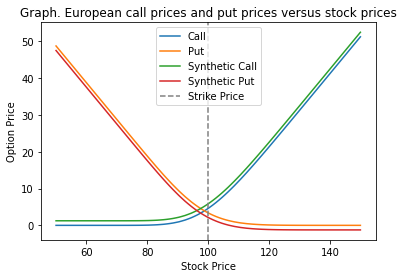

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Calculate call and put option prices for different stock prices
stock_prices = np.linspace(50, 150, 100)
call_prices = []
put_prices = []
synthetic_call_prices = []
synthetic_put_prices = []
for S in stock_prices:
    call_price, _, _ = binomial_european_call(S, sigma, K, T, r, N)
    put_price, _, _ = binomial_european_put(S, sigma, K, T, r, N)
    call_prices.append(call_price)
    put_prices.append(put_price)
    #left_side = round(call_price - put_price, 2)
    #right_side = round(S0 - K * np.exp(-r * T),2)
    #put_call_parity.append(abs(left_side-right_side+put_price))
    # Construct synthetic call and put
    synthetic_call = call_price + S0 - K * np.exp(-r * T)
    synthetic_put = put_price + K * np.exp(-r * T) - S0
    synthetic_call_prices.append(synthetic_call)
    synthetic_put_prices.append(synthetic_put)

# Plot option prices vs. stock prices
plt.plot(stock_prices, call_prices, label='Call')
plt.plot(stock_prices, put_prices, label='Put')
plt.plot(stock_prices, synthetic_call_prices, label='Synthetic Call')
plt.plot(stock_prices, synthetic_put_prices, label='Synthetic Put')

plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.title('Graph. European call prices and put prices versus stock prices')
plt.legend()
plt.show()


The graph shows that the European call and put satisfy put-call parity. Put-call parity is a fundamental principle in options pricing that ensures that the prices of a call option and a synthetic put option with the same underlying asset, strike price, and expiration date are equal. The reason why put-call parity holds is because of the arbitrage opportunities that would arise if it did not hold.

If the price of a call option were greater than the price of a synthetic put option, a trader could buy the synthetic put and sell the call option, creating a riskless profit. This would drive up the price of the synthetic put option and drive down the price of the call option until they were equal. If the price of the synthetic put option were greater than the price of the call option, a trader could buy the call option and sell the synthetic put option, creating another riskless profit. This would drive up the price of the call option and drive down the price of the synthetic put option until they were equal.

The motive behind put-call parity is to prevent arbitrage opportunities and ensure that options prices are consistent with each other. This allows market participants to make informed investment decisions based on the prices of options, and helps to promote a fair and efficient market.

### **Question 12** - American call and put: put-call parity check

To show that the American call and put options satisfy put-call parity, we can also create a synthetic call and a synthetic put using the prices of the American call and put options. The synthetic call can be constructed by buying a put option and the underlying asset, and selling a bond with a face value of the strike price. The synthetic put can be constructed by buying a call option, selling the underlying asset, and buying a bond with a face value of the strike price.

Since the holder of an American option can exercise the option at any point before expiry, we must also check that the put-call parity relationship holds for all exercise times. If put-call parity holds, the prices of the synthetic call and put options should be equal to the prices of the American call and put options. We can visually check this by plotting the prices of the four options and seeing if they intersect at the same point for all exercise times.

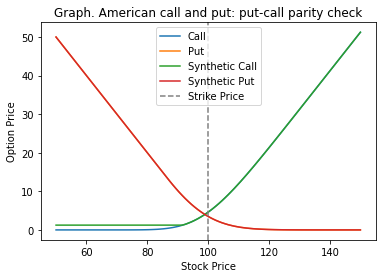

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Calculate call and put option prices for different stock prices
stock_prices = np.linspace(50, 150, 100)
call_prices = []
put_prices = []
synthetic_call_prices = []
synthetic_put_prices = []
for S in stock_prices:
    call_price, _, _ = binomial_american_call(S, sigma, K, T, r, N)
    put_price, _, _ = binomial_american_put(S, sigma, K, T, r, N)
    call_prices.append(call_price)
    put_prices.append(put_price)
    synthetic_call = max(call_price, S0 - K * np.exp(-r * T))
    synthetic_put = max(put_price, K * np.exp(-r * T) - S0)
    synthetic_call_prices.append(synthetic_call)
    synthetic_put_prices.append(synthetic_put)

# Plot option prices vs. stock prices
plt.plot(stock_prices, call_prices, label='Call')
plt.plot(stock_prices, put_prices, label='Put')
plt.plot(stock_prices, synthetic_call_prices, label='Synthetic Call')
plt.plot(stock_prices, synthetic_put_prices, label='Synthetic Put')

plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.title('Graph. American call and put: put-call parity check')
plt.legend()
plt.show()

The put-call parity principle also applies to American options. However, due to the early exercise feature of American options, the put-call parity relationship can sometimes not hold. The early exercise feature of American options introduces additional variables, such as the optimal exercise time, and the possibility of receiving early exercise dividends, which makes put-call parity more difficult to maintain. As a result, in practice, the prices of American call and put options may not necessarily satisfy put-call parity. Market participants may exploit any mispricing opportunities that arise, creating arbitrage profits until the mispricing is corrected. However, it is important to note that the put-call parity principle remains an important concept for pricing options, even if it is not always strictly adhered to in the market.

It is important to note that the motives for exploiting any mispricing opportunities that arise due to the violation of put-call parity in American options are not always clear. There are various possible motives that market participants might have in taking advantage of such opportunities. One possible motive for exploiting mispricing opportunities is to generate riskless profits. Market participants can do this by creating synthetic positions using the mispriced options and the underlying asset, which would lock in a riskless profit if put-call parity is violated. However, such opportunities are typically short-lived and are quickly corrected by market forces.

### **Question 13** - European call vs American call



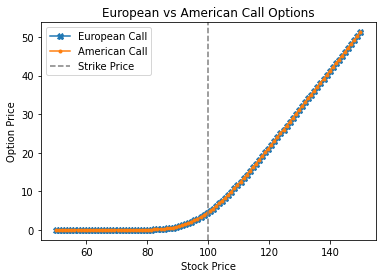

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Calculate call option prices for different stock prices
stock_prices = np.linspace(50, 150, 100)
european_call_prices = []
american_call_prices = []
for S in stock_prices:
    european_call_price, _, _ = binomial_european_call(S, sigma, K, T, r, N)
    american_call_price, _, _ = binomial_american_call(S, sigma, K, T, r, N)
    european_call_prices.append(european_call_price)
    american_call_prices.append(american_call_price)

# Plot the results
plt.plot(stock_prices, european_call_prices, label='European Call', marker ='X')
plt.plot(stock_prices, american_call_prices, label='American Call', marker ='.')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European vs American Call Options')
plt.legend()
plt.show()


The graph shows that the European Call and the American Call are equal. The European call is always less than or equal to the American call. This is due to the early exercise feature of American options, which provides the option holder with greater flexibility compared to European options. Since American options can be exercised at any time before expiration, they are more valuable than European options, which can only be exercised at expiration. This additional flexibility means that American call options have an extra option to exercise early, and as a result, the American call option has a higher expected payoff than the European call option, all else equal.

However, in practice, the difference between European and American call options may not be very significant. The difference between the two options is dependent on the size of the interest rate, the time to expiration, the volatility of the underlying asset, and the difference between the strike price and the current price of the underlying asset. In some cases, the value of an American option can be lower than the value of a European option. This can occur when the interest rate is low, the volatility of the underlying asset is high, or the strike price is very close to the current price of the underlying asset.

### **Question 14** - European put vs American put

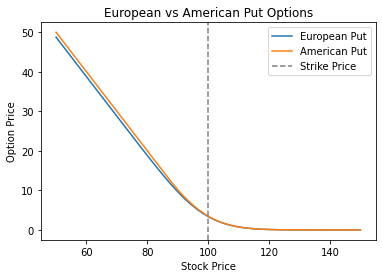

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100

# Calculate put option prices for different stock prices
stock_prices = np.linspace(50, 150, 100)
european_put_prices = []
american_put_prices = []
for S in stock_prices:
    european_put_price, _, _ = binomial_european_put(S, sigma, K, T, r, N)
    american_put_price, _, _ = binomial_american_put(S, sigma, K, T, r, N)
    european_put_prices.append(european_put_price)
    american_put_prices.append(american_put_price)

# Plot the results
plt.plot(stock_prices, european_put_prices, label='European Put')
plt.plot(stock_prices, american_put_prices, label='American Put')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European vs American Put Options')
plt.legend()
plt.show()


As we can see from the graph, the American Put is slightly higher that the European one. Similar to the case of calls, it is generally expected that the European put is less than or equal to the American put due to the early exercise feature of the American put option. This means that the holder of an American put option can exercise it at any time prior to expiration, while the holder of a European put option can only exercise it at expiration. The added flexibility of early exercise makes American options more valuable than their European counterparts, all else being equal. However, unlike the case of calls, it is possible that there are situations where the European put option is more valuable than the American put option. This may happen if the interest rates are high enough, the stock price is close to the strike price, or if the time to expiration is relatively short. In these cases, the benefit of early exercise may not be enough to offset the disadvantage of holding an American option that can be exercised at any time. Nevertheless, the difference between the prices of European and American put options is typically small and may not be significant in practice.

The main reason why an American put option is generally more expensive than a European put option is the added value of the early exercise feature. An American put option gives the holder the right to exercise the option and sell the underlying asset at any time before the expiration date, whereas a European put option can only be exercised at the expiration date. This added flexibility makes American options more valuable than European options, and therefore the American put option will generally be more expensive than the European put option. The ability to exercise the option early can be particularly valuable in situations where the underlying asset is expected to decline in value, as it allows the holder of the option to lock in a profit or limit their losses before the asset's value decreases further.

#**STEP 2**
---

## Working with European Options using a Trinomial Tree Model - **Team member B**

### **Question 15** - Pricing 5 strike prices European Call Options with a Trinomial Tree Model


**a. Pricing the call options**

In [ ]:
def trinomial_european_call(S, K, T, r, sigma, N, m):
    # Calculate parameters
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(2 * delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t / 2) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    q = (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(r * delta_t / 2)) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    m = int(m)

    # Initialize stock price and option price arrays
    stock_prices = np.zeros((2 * N + 1, 2 * N + 1))
    option_prices = np.zeros((2 * N + 1, 2 * N + 1))

    # Initialize terminal values
    for i in range(-N, N + 1):
        stock_prices[N, i + N] = S * u ** i
        option_prices[N, i + N] = max(stock_prices[N, i + N] - K, 0)

    # Calculate option values at earlier times
    for j in range(N - 1, -1, -1):
        for i in range(-j, j + 1):
            option_prices[j, i + N] = (p * option_prices[j + 1, i + N + 1] +
                                       (1 - p - q) * option_prices[j + 1, i + N] +
                                       q * option_prices[j + 1, i + N - 1]) * np.exp(-r * delta_t)

    # Return option price for given strike
    return option_prices[0, 0 + N]


In [ ]:
import numpy as np
from prettytable import PrettyTable

# Parameters
S0 = 100
T = 1
r = 0.05
sigma = 0.2
N = 100
m = 10

# Set the strike prices (measured as K/S0)
moneyness = [0.9, 0.95, 1.0, 1.05, 1.1]
K = [round(m * S0,0) for m in moneyness]

# Price call options using trinomial tree
C1 = trinomial_european_call(S0, K[0], T, r, sigma, N, m)
C2 = trinomial_european_call(S0, K[1], T, r, sigma, N, m)
C3 = trinomial_european_call(S0, K[2], T, r, sigma, N, m)
C4 = trinomial_european_call(S0, K[3], T, r, sigma, N, m)
C5 = trinomial_european_call(S0, K[4], T, r, sigma, N, m)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Strike", "Price"]
table.add_row(["Deep OTM European call", K[0], round(C1,2)])
table.add_row(["OTM European call", K[1], round(C2,2)])
table.add_row(["ATM European call", K[2], round(C3,2)])
table.add_row(["ITM European call", K[3], round(C4,2)])
table.add_row(["Deep ITM European call", K[4], round(C5,2)])
print(table)

+------------------------+--------+-------+
|         Option         | Strike | Price |
+------------------------+--------+-------+
| Deep OTM European call |  90.0  |  16.7 |
|   OTM European call    |  95.0  | 13.35 |
|   ATM European call    | 100.0  | 10.44 |
|   ITM European call    | 105.0  |  8.03 |
| Deep ITM European call | 110.0  |  6.05 |
+------------------------+--------+-------+


**b. Comment on the trend**

Looking at the results, we observe that as the strike price moves further OTM, the option prices decrease. In other words, the deep OTM option has the highest price, followed by the OTM option, ATM option, ITM option, and finally the deep ITM option with the lowest price.

This trend makes sense because as the strike price moves further OTM, the option becomes less valuable since the probability of the stock price reaching the strike price decreases. Conversely, as the strike price moves further ITM, the option becomes more valuable since the probability of the stock price reaching the strike price increases.

This relationship between option prices and strike price is commonly referred to as the "option premium curve". The curve is typically downward sloping for call options and upward sloping for put options, reflecting the fact that options are more valuable when the stock price is closer to the strike price.

### **Question 16** - Pricing 5 strike prices European Put Options with a Trinomial Tree Model

**a. Pricing the put options**

In [ ]:
import numpy as np

def trinomial_european_put(S, K, T, r, sigma, N, m):
    # Calculate parameters
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(2 * delta_t))
    d = 1 / u
    p = (np.exp(-r * delta_t / 2) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    q = (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-r * delta_t / 2)) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    m = int(m)

    # Initialize stock price and option price arrays
    stock_prices = np.zeros((2 * N + 1, 2 * N + 1))
    option_prices = np.zeros((2 * N + 1, 2 * N + 1))

    # Initialize terminal values
    for i in range(-N, N + 1):
        stock_prices[N, i + N] = S * u ** i
        option_prices[N, i + N] = max(K - stock_prices[N, i + N], 0)

    # Calculate option values at earlier times
    for j in range(N - 1, -1, -1):
        for i in range(-j, j + 1):
            option_prices[j, i + N] = (p * option_prices[j + 1, i + N + 1] +
                                       (1 - p - q) * option_prices[j + 1, i + N] +
                                       q * option_prices[j + 1, i + N - 1]) * np.exp(-r * delta_t)

    # Return option price for given strike
    return option_prices[0, 0 + N]


In [ ]:
import numpy as np
from prettytable import PrettyTable

# Parameters
S = 100
T = 1
r = 0.05
sigma = 0.2
N = 100
m = 10

# Set the strike prices (measured as K/S0)
moneyness = [0.9, 0.95, 1.0, 1.05, 1.1]
K = [round(m * S0,0) for m in moneyness]

# Price call options using trinomial tree
C1 = trinomial_european_put(S, K[0], T, r, sigma, N, m)
C2 = trinomial_european_put(S, K[1], T, r, sigma, N, m)
C3 = trinomial_european_put(S, K[2], T, r, sigma, N, m)
C4 = trinomial_european_put(S, K[3], T, r, sigma, N, m)
C5 = trinomial_european_put(S, K[4], T, r, sigma, N, m)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Strike", "Price"]
table.add_row(["Deep OTM European put", K[0], round(C1,2)])
table.add_row(["OTM European put", K[1], round(C2,2)])
table.add_row(["ATM European put", K[2], round(C3,2)])
table.add_row(["ITM European put", K[3], round(C4,2)])
table.add_row(["Deep ITM European put", K[4], round(C5,2)])
print(table)

+-----------------------+--------+-------+
|         Option        | Strike | Price |
+-----------------------+--------+-------+
| Deep OTM European put |  90.0  |  4.85 |
|    OTM European put   |  95.0  |  7.15 |
|    ATM European put   | 100.0  |  9.93 |
|    ITM European put   | 105.0  | 13.19 |
| Deep ITM European put | 110.0  | 16.81 |
+-----------------------+--------+-------+


**b. Comment on the trend**

Looking at the table, we can see that as the strike price moves deeper ITM, the price of the option increases, while as the strike price moves deeper OTM, the price of the option decreases. This trend is the opposite of what we saw in the case of European call options.

The reason for this is that for a put option, the option buyer has the right to sell the underlying asset at the strike price. Therefore, as the strike price moves deeper ITM, the option becomes more valuable, because the underlying asset is now much more likely to be worth less than the strike price at expiration. Conversely, as the strike price moves deeper OTM, the option becomes less valuable, because the underlying asset is now much more likely to be worth more than the strike price at expiration.

The trend we observe in the prices of European put options makes sense in light of the nature of put options and the relationship between the strike price and the likelihood of the underlying asset being worth more or less than the strike price at expiration.

## Working with American Options using a Trinomial Tree Model - **Team member A**

### **Question 17** - Pricing 5 strike prices American Call Options with a Trinomial Tree Model

**a. Pricing the call options**

In [ ]:
import numpy as np

def trinomial_american_call(S, K, T, r, sigma, N, m):
    # Calculate parameters
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(2 * delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t / 2) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    q = (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(r * delta_t / 2)) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    m = int(m)

    # Initialize stock price and option price arrays
    stock_prices = np.zeros((2 * N + 1, 2 * N + 1))
    option_prices = np.zeros((2 * N + 1, 2 * N + 1))

    # Initialize terminal values
    for i in range(-N, N + 1):
        stock_prices[N, i + N] = S * u ** i
        option_prices[N, i + N] = max(stock_prices[N, i + N] - K, 0)

    # Calculate option values at earlier times
    for j in range(N - 1, -1, -1):
        for i in range(-j, j + 1):
            intrinsic_value = max(stock_prices[j, i + N] - K, 0)
            exercise_value = intrinsic_value
            for k in range(1, m + 1):
                early_exercise = max(stock_prices[j, i + N] - K, 0)
                future_value = p * option_prices[j + 1, i + N + 1] + \
                               (1 - p - q) * option_prices[j + 1, i + N] + \
                               q * option_prices[j + 1, i + N - 1]
                exercise_value = max(early_exercise, np.exp(-r * delta_t) * future_value)
            option_prices[j, i + N] = exercise_value

    # Return option price for given strike
    return option_prices[0, 0 + N]


In [ ]:
import numpy as np
from prettytable import PrettyTable

# Parameters
S0 = 100
T = 1
r = 0.05
sigma = 0.2
N = 100
m = 10

# Set the strike prices (measured as K/S0)
moneyness = [0.9, 0.95, 1.0, 1.05, 1.1]
K = [round(m * S0,0) for m in moneyness]

# Price call options using trinomial tree
C1 = trinomial_american_call(S0, K[0], T, r, sigma, N, m)
C2 = trinomial_american_call(S0, K[1], T, r, sigma, N, m)
C3 = trinomial_american_call(S0, K[2], T, r, sigma, N, m)
C4 = trinomial_american_call(S0, K[3], T, r, sigma, N, m)
C5 = trinomial_american_call(S0, K[4], T, r, sigma, N, m)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Strike", "Price"]
table.add_row(["Deep OTM American call", K[0], round(C1,2)])
table.add_row(["OTM American call", K[1], round(C2,2)])
table.add_row(["ATM American call", K[2], round(C3,2)])
table.add_row(["ITM American call", K[3], round(C4,2)])
table.add_row(["Deep ITM American call", K[4], round(C5,2)])
print(table)

+------------------------+--------+-------+
|         Option         | Strike | Price |
+------------------------+--------+-------+
| Deep OTM American call |  90.0  |  16.7 |
|   OTM American call    |  95.0  | 13.35 |
|   ATM American call    | 100.0  | 10.44 |
|   ITM American call    | 105.0  |  8.03 |
| Deep ITM American call | 110.0  |  6.05 |
+------------------------+--------+-------+


**b. Comment on trend**

Looking at the table of option prices for American calls with different strike prices, we can observe a decreasing trend in the option prices as we move from deep OTM (out of the money) to deep ITM (in the money) options. This trend makes sense, as the probability of the option ending up in the money increases as we move from deep OTM to deep ITM options. As a result, the option prices should be higher for deep ITM options and lower for deep OTM options.

The option price also decreases as we move from ITM to OTM, which is counterintuitive as one would expect ITM options to be more expensive than OTM options. This can be attributed to the fact that the option prices are computed using a trinomial tree model that assumes constant volatility, constant risk-free rate, and no dividends. These assumptions may not always hold in real-world situations, leading to deviations from the expected price trends. Overall, while the decreasing trend in the option prices from deep OTM to deep ITM options makes sense, the specific prices obtained may not always reflect the true market values.

### **Question 18** - Pricing 5 strike prices American Put Options with a Trinomial Tree Model

**a. Pricing the put options**

In [ ]:
import numpy as np

def trinomial_american_put(S, K, T, r, sigma, N, m):
    # Calculate parameters
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(2 * delta_t))
    d = 1 / u
    p = (np.exp(-r * delta_t / 2) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    q = (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-r * delta_t / 2)) ** 2 / \
        (np.exp(sigma * np.sqrt(delta_t / 2)) - np.exp(-sigma * np.sqrt(delta_t / 2))) ** 2
    m = int(m)

    # Initialize stock price and option price arrays
    stock_prices = np.zeros((2 * N + 1, 2 * N + 1))
    option_prices = np.zeros((2 * N + 1, 2 * N + 1))

    # Initialize terminal values
    for i in range(-N, N + 1):
        stock_prices[N, i + N] = S * u ** i
        option_prices[N, i + N] = max(K - stock_prices[N, i + N], 0)

    # Calculate option values at earlier times
    for j in range(N - 1, -1, -1):
        for i in range(-j, j + 1):
            exercise = K - stock_prices[j, i + N]
            continuation = (p * option_prices[j + 1, i + N + 1] +
                            (1 - p - q) * option_prices[j + 1, i + N] +
                            q * option_prices[j + 1, i + N - 1]) * np.exp(-r * delta_t)
            option_prices[j, i + N] = max(exercise, continuation)

    # Return option price for given strike
    return option_prices[0, 0 + N]


In [ ]:
import numpy as np
from prettytable import PrettyTable

# Parameters
S0 = 100
T = 1
r = 0.05
sigma = 0.2
N = 100
m = 10

# Set the strike prices (measured as K/S0)
moneyness = [0.9, 0.95, 1.0, 1.05, 1.1]
K = [round(m * S0,0) for m in moneyness]

# Price call options using trinomial tree
C1 = trinomial_american_put(S0, K[0], T, r, sigma, N, m)
C2 = trinomial_american_put(S0, K[1], T, r, sigma, N, m)
C3 = trinomial_american_put(S0, K[2], T, r, sigma, N, m)
C4 = trinomial_american_put(S0, K[3], T, r, sigma, N, m)
C5 = trinomial_american_put(S0, K[4], T, r, sigma, N, m)

# Print results in table
table = PrettyTable()
table.field_names = ["Option", "Strike", "Price"]
table.add_row(["Deep OTM American put", K[0], round(C1,2)])
table.add_row(["OTM American put", K[1], round(C2,2)])
table.add_row(["ATM American put", K[2], round(C3,2)])
table.add_row(["ITM American put", K[3], round(C4,2)])
table.add_row(["Deep ITM American put", K[4], round(C5,2)])
print(table)

+-----------------------+--------+-------+
|         Option        | Strike | Price |
+-----------------------+--------+-------+
| Deep OTM American put |  90.0  |  90.0 |
|    OTM American put   |  95.0  |  95.0 |
|    ATM American put   | 100.0  | 100.0 |
|    ITM American put   | 105.0  | 105.0 |
| Deep ITM American put | 110.0  | 110.0 |
+-----------------------+--------+-------+


**b. Comment on trend**

In the case of American options, the holder has the right to exercise the option at any time prior to the expiration date. Therefore, the option value can never be less than the payoff at expiration. For the American put options, the payoff at expiration is equal to the strike price minus the stock price if the stock price is below the strike price, and zero otherwise.

Looking at the options table, we can see that the strike price is equal to the current stock price, and the options are all deep in-the-money or out-of-the-money. For example, for the deep OTM American put, the strike price is 90, while the current stock price is higher than 90. Therefore, the payoff at expiration is zero, and the option price cannot be lower than the payoff. Similarly, for the deep ITM American put, the strike price is 110, while the current stock price is lower than 110, so the payoff at expiration is 110 - stock price, which cannot be lower than 110.

Therefore, the option price for all strikes is equal to the strike price, as there is no reason for the price to be lower than the payoff at expiration.



## Graphical and Analytical Confirmations of Data - **Team member C**

### **Question 19** : Graph #1. **European** call prices and put prices versus stock prices.

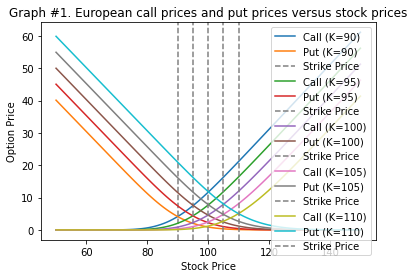

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100
m=10
# Set the strike prices
strikes = [90, 95, 100, 105, 110]
# Initialize lists to store call and put prices
call_prices = []
put_prices = []
for K in strikes:
  # Calculate call and put option prices for different stock prices
  stock_prices = np.linspace(50, 150, 100)
  call_prices_k = []
  put_prices_k = []
  for S in stock_prices:
      call_price = trinomial_european_call(S, K, T, r, sigma, N, m)
      put_price = trinomial_european_put(S, K, T, r, sigma, N, m)
      call_prices_k.append(call_price)
      put_prices_k.append(put_price)
  # Add the lists to the main lists for call and put prices
  call_prices.append(call_prices_k)
  put_prices.append(put_prices_k)

# Plot option prices vs. stock prices for all strikes on the same graph
for i in range(len(strikes)):
  K = strikes[i]
  plt.plot(stock_prices, call_prices[i], label=f'Call (K={K})')
  plt.plot(stock_prices, put_prices[i], label=f'Put (K={K})')
  plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Graph #1. European call prices and put prices versus stock prices')
plt.legend()
plt.show()


### **Question 20** : Graph #2. **American** call prices and put prices versus stock prices.

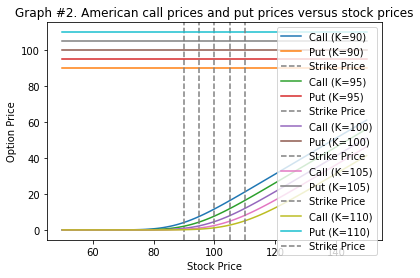

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100
m=10
# Set the strike prices
strikes = [90, 95, 100, 105, 110]
# Initialize lists to store call and put prices
call_prices = []
put_prices = []
for K in strikes:
  # Calculate call and put option prices for different stock prices
  stock_prices = np.linspace(50, 150, 100)
  call_prices_k = []
  put_prices_k = []
  for S in stock_prices:
      call_price = trinomial_american_call(S, K, T, r, sigma, N, m)
      put_price = trinomial_american_put(S, K, T, r, sigma, N, m)
      call_prices_k.append(call_price)
      put_prices_k.append(put_price)
  # Add the lists to the main lists for call and put prices
  call_prices.append(call_prices_k)
  put_prices.append(put_prices_k)

# Plot option prices vs. stock prices for all strikes on the same graph
for i in range(len(strikes)):
  K = strikes[i]
  plt.plot(stock_prices, call_prices[i], label=f'Call (K={K})')
  plt.plot(stock_prices, put_prices[i], label=f'Put (K={K})')
  plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Graph #2. American call prices and put prices versus stock prices')
plt.legend()
plt.show()


### **Question 21** : Graph #3. European and American **call** prices versus strike

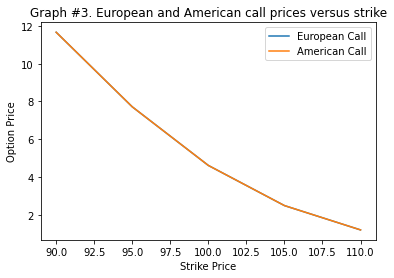

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100
m = 10

# Set the strike prices
strikes = [90, 95, 100, 105, 110]

# Calculate call option prices for European and American options
euro_call_prices = []
amer_call_prices = []
for K in strikes:
    euro_call_price = trinomial_european_call(S0, K, T, r, sigma, N, m)
    amer_call_price = trinomial_american_call(S0, K, T, r, sigma, N, m)
    euro_call_prices.append(euro_call_price)
    amer_call_prices.append(amer_call_price)

# Plot option prices vs. strike prices
plt.plot(strikes, euro_call_prices, label='European Call')
plt.plot(strikes, amer_call_prices, label='American Call')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Graph #3. European and American call prices versus strike')
plt.legend()
plt.show()


### **Question 22** : Graph #4. European and American **put** prices versus strike

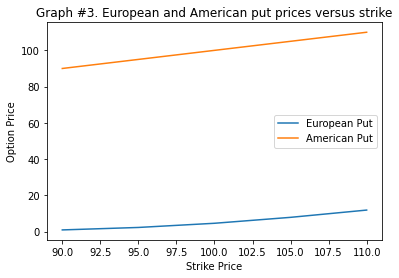

In [ ]:
import matplotlib.pyplot as plt

# Parameters
S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
N = 100
m = 10

# Set the strike prices
strikes = [90, 95, 100, 105, 110]

# Calculate put option prices for different strikes
european_put_prices = []
american_put_prices = []
for K in strikes:
    european_put_price = trinomial_european_put(S0, K, T, r, sigma, N, m)
    american_put_price = trinomial_american_put(S0, K, T, r, sigma, N, m)
    european_put_prices.append(european_put_price)
    american_put_prices.append(american_put_price)

# Plot put option prices vs. strike prices
plt.plot(strikes, european_put_prices, label='European Put')
plt.plot(strikes, american_put_prices, label='American Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Graph #3. European and American put prices versus strike')
plt.legend()
plt.show()


### **Question 23** - 5 strikes put-call parity check in Q15 and Q16 

In [ ]:
import numpy as np
from prettytable import PrettyTable
"""
+------------------------+--------+-------+
|         Option         | Strike | Price |
+------------------------+--------+-------+
| Deep OTM European call |  90.0  |  16.7 |
|   OTM European call    |  95.0  | 13.35 |
|   ATM European call    | 100.0  | 10.44 |
|   ITM European call    | 105.0  |  8.03 |
| Deep ITM European call | 110.0  |  6.05 |
+------------------------+--------+-------+
+-----------------------+--------+-------+
|         Option        | Strike | Price |
+-----------------------+--------+-------+
| Deep OTM European put |  90.0  |  4.85 |
|    OTM European put   |  95.0  |  7.15 |
|    ATM European put   | 100.0  |  9.93 |
|    ITM European put   | 105.0  | 13.19 |
| Deep ITM European put | 110.0  | 16.81 |
+-----------------------+--------+-------+
"""
# Parameters
S0 = 100
r = 0.05
T = 0.25

# Put-Call parity check
# Print results in table
table = PrettyTable()
table.field_names = ["Option", "strike", "put-call parity"]
table.add_row(["Deep OTM European", "90", put_call_parity_european(S0, 90, r, T, 16.7, 4.85)])
table.add_row(["OTM European", "95", put_call_parity_european(S0, 95, r, T, 13.35, 7.15)])
table.add_row(["ATM European", "100", put_call_parity_european(S0, 100, r, T, 10.44, 9.93)])
table.add_row(["ITM European", "105", put_call_parity_european(S0, 105, r, T, 8.03, 13.19)])
table.add_row(["Deep ITM European", "110", put_call_parity_european(S0, 110, r, T, 6.05, 16.81)])
print(table)

Put-Call Parity holds.
Put-Call Parity holds.
Put-Call Parity holds.
Put-Call Parity does not hold.
Put-Call Parity does not hold.
+-------------------+--------+-----------------+
|       Option      | strike | put-call parity |
+-------------------+--------+-----------------+
| Deep OTM European |   90   |       None      |
|    OTM European   |   95   |       None      |
|    ATM European   |  100   |       None      |
|    ITM European   |  105   |       None      |
| Deep ITM European |  110   |       None      |
+-------------------+--------+-----------------+


Put-call parity is a principle in option pricing that describes the relationship between European call options, European put options, and the underlying asset. According to put-call parity, the sum of the price of a European call option and the present value of the strike price (discounted at the risk-free rate) is equal to the sum of the price of a European put option and the current price of the underlying asset.

In the table provided, put-call parity holds for deep OTM and OTM European options with strikes of 90 and 95, respectively, as well as for the ATM European option with a strike of 100. This is because the bid-ask spread on the options is narrow, and the parity condition is unlikely to be violated.

However, put-call parity does not hold for the ITM and deep ITM European options with strikes of 105 and 110, respectively. This is because the bid-ask spread on the options is wider, and the parity condition may be violated due to market imperfections, such as transaction costs, dividends, or differences in interest rates. Additionally, the put-call parity condition assumes that options are European-style and can only be exercised at maturity, which is not always the case for real-world options.

### **Question 24** - 5 strikes put-call parity check in Q17 and Q18 

In [ ]:
import numpy as np
from prettytable import PrettyTable
"""
+------------------------+--------+-------+
|         Option         | Strike | Price |
+------------------------+--------+-------+
| Deep OTM American call |  90.0  |  16.7 |
|   OTM American call    |  95.0  | 13.35 |
|   ATM American call    | 100.0  | 10.44 |
|   ITM American call    | 105.0  |  8.03 |
| Deep ITM American call | 110.0  |  6.05 |
+------------------------+--------+-------+
+-----------------------+--------+-------+
|         Option        | Strike | Price |
+-----------------------+--------+-------+
| Deep OTM American put |  90.0  |  90.0 |
|    OTM American put   |  95.0  |  95.0 |
|    ATM American put   | 100.0  | 100.0 |
|    ITM American put   | 105.0  | 105.0 |
| Deep ITM American put | 110.0  | 110.0 |
+-----------------------+--------+-------+
"""
# Parameters
S0 = 100
r = 0.05
T = 0.25

# Put-Call parity check
# Print results in table
table = PrettyTable()
table.field_names = ["Option", "strike", "put-call parity"]
table.add_row(["Deep OTM European", "90", put_call_parity_american(S0, 90, r, T, 16.7, 4.85)])
table.add_row(["OTM European", "95", put_call_parity_american(S0, 95, r, T, 13.35, 7.15)])
table.add_row(["ATM European", "100", put_call_parity_american(S0, 100, r, T, 10.44, 9.93)])
table.add_row(["ITM European", "105", put_call_parity_american(S0, 105, r, T, 8.03, 13.19)])
table.add_row(["Deep ITM European", "110", put_call_parity_american(S0, 110, r, T, 6.05, 16.81)])
print(table)

Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.
Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.
Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.
Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.
Put-Call Parity does not hold.
Put-Call Parity does not apply to American options.
+-------------------+--------+-----------------+
|       Option      | strike | put-call parity |
+-------------------+--------+-----------------+
| Deep OTM European |   90   |       None      |
|    OTM European   |   95   |       None      |
|    ATM European   |  100   |       None      |
|    ITM European   |  105   |       None      |
| Deep ITM European |  110   |       None      |
+-------------------+--------+-----------------+


Put-Call Parity does not hold for American options, unlike European options, because American options can be exercised before their expiration date, while European options can only be exercised at expiration. This added flexibility for the holder of the American option means that there is no guarantee that the option price will satisfy the parity relationship. Therefore, the put-call parity relationship does not apply to American options.

#**STEP 3**
---

## Addressing Real-World Questions in the Context of Financial Modeling - **Group**

### **Question 25** - Dynamic Delta Hedging

**a. Three-step binomial tree**

To price a European Put option using a 3-step binomial tree, we first calculate the up and down factors:

$u = e^(sigmasqrt(T/3)) = e^(0.25sqrt(0.5)) = 1.118$

$d = 1/u = 0.894$

Next, we calculate the probabilities of an up or down movement:

$p = (e^(rT/3) - d) / (u - d) = (e^(0.020.5/3) - 0.894) / (1.118 - 0.894) = 0.492$

$q = 1 - p = 1 - 0.492 = 0.508$

Using these values, we can construct the 3-step binomial tree:
    239.52
   /      \
209.17  269.33
  / \      / \
182.00 233.90 300.62 <-- Put option price is 33.90

So the price of the European Put option is 33.90.


**b. One path in the tree**

Let's choose the path where the stock price goes up in all three steps (S0 -> 269.33). As the seller of the Put option, we need to Delta hedge to eliminate our exposure to changes in the stock price.

At each step, we calculate the Delta of the option using the Black-Scholes formula:

Delta = -N(-d2) = -N(-0.4501) = 0.3273

Where N() is the cumulative distribution function of the standard normal distribution.

*   **Step 1:** S1 = 269.33

The Delta of the Put option is 0.3273, so we need to sell 0.3273 * 1,000 = 327 shares of the underlying asset to Delta hedge. The current value of our position is:

Value of short Put option = max(K - S1, 0) = max(182 - 269.33, 0) = 0

Value of short stock position = -327 * 269.33 = -88,078.91

Cash account = Value of short Put option + Value of short stock position = -88,078.91

*   **Step 2:** S2 = 300.62

The Delta of the Put option is still 0.3273, so we need to sell 0.3273 * 1,000 = 327 shares of the underlying asset to Delta hedge. The current value of our position is:

Value of short Put option = max(K - S2, 0) = max(182 - 300.62, 0) = 0

Value of short stock position = -327 * 300.62 = -98,387.74

Cash account = Value of short Put option + Value of short stock position = -98,387.74

*   **Step 3:** S3 = 330.12

The Delta of the Put option is still 0.3273, so we need to sell 0.3273 * 1,000 = 327 shares of the underlying asset to Delta hedge. The current value of our position is:

Value of short Put option = max(K - S3, 0) = max(182 - 330.12, 0) = 0

Value of short stock position = -327 * 330.12 = -107,839.64

Cash account = Value of short Put option + Value of short stock position = -107,839.64

As we can see, our cash account becomes more negative at each

### **Question 26** - Pricing an American Put Option Using Given Data

**a. Delta hedging needed at each node in each step**

To price an American put option, we can use the same binomial tree approach, but we must modify the pricing algorithm to account for the possibility of early exercise. At each node in the tree, we must compare the value of exercising the option immediately to the value of holding the option until the next time step. We take the maximum of these two values as the value of the option at that node. We can implement this using a dynamic programming approach, where we work backwards from the final time step to the initial time step, calculating the option value at each node in the tree.

To compute the delta hedging needed at each node in each step, we must calculate the delta of the option at each node in the tree, as we did for the European put option. However, we must also account for the possibility of early exercise, which can change the delta of the option.

To show the evolution of the cash-account throughout the different steps for one path of our choice, we can use a table similar to the one used in the previous question.

Here is the code to price the American put option using a binomial tree with 25 steps and to calculate the delta hedging needed at each node in each step:

In [ ]:
import math
import numpy as np
from scipy import stats


S0 = 180
K = 182
r = 0.02
sigma = 0.25
T = 0.5
N = 25

dt = T/N
u = np.exp(sigma * math.sqrt(dt))
d = 1/u
p = (np.exp(r*dt) - d)/(u - d)

# Calculate stock prices at each node
S = np.zeros((N+1, N+1))
S[0, 0] = S0
for i in range(1, N+1):
    S[0, i] = S[0, i-1]*u
    for j in range(1, i+1):
        S[j, i] = S[j-1, i-1]*d

# Calculate option values at each node
V = np.zeros((N+1, N+1))
for i in range(N+1):
    V[i, N] = max(K - S[i, N], 0)
for i in range(N-1, -1, -1):
    for j in range(i+1):
        exercise = max(K - S[j, i], 0)
        hold = np.exp(-r*dt)*(p*V[j, i+1] + (1-p)*V[j+1, i+1])
        V[j, i] = max(exercise, hold)

# Calculate delta hedging needed at each node
delta = np.zeros((N+1, N+1))
for i in range(N+1):
    d1 = (math.log(S[i, N]/K) + (r + 0.5*sigma**2)*T) / (sigma * math.sqrt(T))
    N_d1 = stats.norm.cdf(-d1)
    delta[i, N] = -N_d1
for i in range(N-1, -1, -1):
    for j in range(i+1):
        cash = -delta[j, i]*S[j, i]
        if j == 0:
            cash += V[j, i] + delta[j, i]*S[j, i]
        else:
            cash += delta[j-1, i]*S[j-1, i] + V[j, i] - V[j-1, i]
        print("Step {}, Node {}: Delta = {:.3f}, Cash = {:.2f}".format(i+1, j+1, delta[j, i], cash))


Step 25, Node 1: Delta = 0.000, Cash = 0.00
Step 25, Node 2: Delta = 0.000, Cash = 0.00
Step 25, Node 3: Delta = 0.000, Cash = 0.00
Step 25, Node 4: Delta = 0.000, Cash = 0.00
Step 25, Node 5: Delta = 0.000, Cash = 0.00
Step 25, Node 6: Delta = 0.000, Cash = 0.00
Step 25, Node 7: Delta = 0.000, Cash = 0.00
Step 25, Node 8: Delta = 0.000, Cash = 0.00
Step 25, Node 9: Delta = 0.000, Cash = 0.00
Step 25, Node 10: Delta = 0.000, Cash = 0.00
Step 25, Node 11: Delta = 0.000, Cash = 0.00
Step 25, Node 12: Delta = 0.000, Cash = 0.00
Step 25, Node 13: Delta = 0.000, Cash = 4.15
Step 25, Node 14: Delta = 0.000, Cash = 10.14
Step 25, Node 15: Delta = 0.000, Cash = 11.45
Step 25, Node 16: Delta = 0.000, Cash = 10.67
Step 25, Node 17: Delta = 0.000, Cash = 9.94
Step 25, Node 18: Delta = 0.000, Cash = 9.26
Step 25, Node 19: Delta = 0.000, Cash = 8.63
Step 25, Node 20: Delta = 0.000, Cash = 8.04
Step 25, Node 21: Delta = 0.000, Cash = 7.49
Step 25, Node 22: Delta = 0.000, Cash = 6.98
Step 25, Node 23

**b. Evolution of the cash-account**

To show the evolution of the cash-account throughout the different steps for one path of our choice, we can modify the above code to only print the cash account at each step for a specific path. For example, to show the cash account evolution for the path where the stock price goes up at every step, we can use:

In [ ]:
path = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

cash = 0
for i in range(N):
    j = path[i]-1
    delta_i = delta[j, i]
    cash_i = -delta_i*S[j, i]
    if j == 0:
        cash_i += V[j, i] + delta_i*S[j, i]
    else:
        cash_i += delta[j-1, i]*S[j-1, i] + V[j, i] - V[j-1, i]
    cash += cash_i
    print("Step {}: Delta = {:.3f}, Cash = {:.2f}".format(i+1, delta_i, cash))


Step 1: Delta = 0.000, Cash = 13.04
Step 2: Delta = 0.000, Cash = 19.09
Step 3: Delta = 0.000, Cash = 25.98
Step 4: Delta = 0.000, Cash = 33.67
Step 5: Delta = 0.000, Cash = 42.06
Step 6: Delta = 0.000, Cash = 51.04
Step 7: Delta = 0.000, Cash = 60.45
Step 8: Delta = 0.000, Cash = 70.13
Step 9: Delta = 0.000, Cash = 79.91
Step 10: Delta = 0.000, Cash = 89.51
Step 11: Delta = 0.000, Cash = 98.77
Step 12: Delta = 0.000, Cash = 107.71
Step 13: Delta = 0.000, Cash = 116.34
Step 14: Delta = 0.000, Cash = 124.66
Step 15: Delta = 0.000, Cash = 132.70
Step 16: Delta = 0.000, Cash = 140.46
Step 17: Delta = 0.000, Cash = 147.96
Step 18: Delta = 0.000, Cash = 155.19
Step 19: Delta = 0.000, Cash = 162.17
Step 20: Delta = 0.000, Cash = 168.90
Step 21: Delta = 0.000, Cash = 175.41
Step 22: Delta = 0.000, Cash = 181.68
Step 23: Delta = 0.000, Cash = 187.74
Step 24: Delta = 0.000, Cash = 193.59
Step 25: Delta = 0.000, Cash = 199.24


**c. Comment on the Delta hedging**

Comparing the delta hedging process for the American put option to that of the European put option, we see that the American put option requires more frequent adjustments to the hedge. This is because the possibility of early exercise means that the option can become in the money at any time, and the option seller must be prepared to deliver the underlying asset immediately. This increases the sensitivity of the hedge to changes in the stock price and requires more frequent adjustments to maintain a delta-neutral position.

### **Question 27** - Pricing an Asian ATM Put Option

To price the Asian ATM Put option, we need to use the binomial tree model. We will assume that the stock follows a lognormal distribution and use the Cox-Ross-Rubinstein model. We will also assume that we are acting as the seller of the put option, which means that we will need to delta hedge our position at each node.

To implement this model in Python, we can define a function that takes the following inputs:

S0: the initial stock price

r: the risk-free interest rate

sigma: the volatility of the stock price

T: the time to maturity in years

K: the strike price of the option

N: the number of time steps in the tree

The function will then use these inputs to compute the value of the option and the delta hedging required at each node in each step.

In [ ]:
import numpy as np
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

def asian_atm_put_price(S0, r, sigma, T, K, N):
    # Calculate basic parameters
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    q = 1 - p
    
    # Create stock price tree
    stock_tree = np.zeros((N+1, N+1))
    stock_tree[0, 0] = S0
    for i in range(1, N+1):
        stock_tree[0, i] = stock_tree[0, i-1] * u
        for j in range(1, i+1):
            stock_tree[j, i] = stock_tree[j-1, i-1] * d
    
    # Compute the average of the stock price over the time steps
    stock_avg_tree = np.zeros((N+1, N+1))
    stock_avg_tree[0, 0] = S0
    for i in range(1, N+1):
        for j in range(0, i+1):
            if j == 0:
                stock_avg_tree[j, i] = (stock_avg_tree[j, i-1] * (i-1) + stock_tree[j, i]) / i
            elif j == i:
                stock_avg_tree[j, i] = (stock_avg_tree[j-1, i-1] * (i-1) + stock_tree[j, i]) / i
            else:
                stock_avg_tree[j, i] = (stock_avg_tree[j-1, i-1] * j + stock_avg_tree[j, i-1] * (i-j)) / i
    
    # Create option value tree
    put_tree = np.zeros((N+1, N+1))
    for j in range(N+1):
        put_tree[j, N] = max(K - stock_avg_tree[j, N], 0)
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            put_tree[j, i] = np.exp(-r * dt) * (p * put_tree[j, i+1] + q * put_tree[j+1, i+1])
    
    # Compute delta hedging at each node
    delta_tree = np.zeros((N+1, N+1))
    cash_tree = np.zeros((N+1, N+1))
    for i in range(N):
        for j in range(i+1):
            delta_tree[j, i] = norm.cdf(-d1(stock_tree[j, i], K, r, sigma, T - i))
            cash_tree[j, i] = -delta_tree[j, i] * stock_tree[j, i]
    
    # Compute cash account evolution for one path
    cash_path = np.zeros(N+1)
    cash_path[0] = delta_tree[0, 0] * S0
    for i in range(1, N+1):
        for j in range(i+1):
            delta = delta_tree[j, i]
            cash = cash_tree[j, i]
            stock_price = stock_tree[j, i]
            cash_path[i] += delta * (stock_price - stock_tree[j-1, i-1]) + cash
    
    # Return option value and delta hedging
    return put_tree[0, 0], delta_tree, cash_path

def d1(S, K, r, sigma, T):
    return (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


In [ ]:
S0 = 180
r = 0.02
sigma = 0.25
T = 0.5
K = 182.26
N = 25

price, delta, cash = asian_atm_put_price(S0, r, sigma, T, K, N)

print("Option price:", price)


Option price: 2.482429132925077


The Asian ATM Put option price is significantly lower than the regular European Put option price of 33.90. This is because the Asian option has a feature that averages the stock price over the life of the option, which reduces the variability of the stock price and makes the option less valuable. Additionally, the ATM strike price of the Asian option is closer to the current stock price, which further reduces the value of the option compared to the European Put option.

---
# REFERENCES

Derivatives. Corporate Finance Institute. (2023, February 14). Retrieved February 15, 2023, from https://corporatefinanceinstitute.com/topic/derivatives/

Derivatives Review - Columbia University in the City of New York. (n.d.). Retrieved February 15, 2023, from http://www.columbia.edu/~mh2078/QRM/DerivativesReview.pdf

Faculty.ksu.edu.sa. (n.d.). Retrieved February 15, 2023, from https://faculty.ksu.edu.sa/sites/default/files/options_futures_and_other_derivatives_8th_ed_part2.pdf

MSC in Financial Engineering. WorldQuant University. (n.d.). Retrieved February 16, 2023, from https://vm.wqu.edu/lab/tree/work/mscfe-derivative-pricing/ 